## Classification of LSBG candidates from Y6 data

In [28]:
# Import packages
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
import sklearn
from sklearn import preprocessing
import pickle
#from sklearn.externals import joblib
import joblib


import urllib
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
# ====================================
# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    #plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return
plot_pretty()

In [29]:
DES_Y6 = fits.open('y6_gold_2_0_lsb_skim.fits')

In [30]:
# Load 
coadd_id = DES_Y6[1].data['COADD_OBJECT_ID']
ra = DES_Y6[1].data['RA']
dec = DES_Y6[1].data['DEC']
A_IMAGE = DES_Y6[1].data['A_IMAGE']
B_IMAGE = DES_Y6[1].data['B_IMAGE']
MAG_AUTO_G = DES_Y6[1].data['MAG_AUTO_G']
FLUX_RADIUS_G = 0.263*DES_Y6[1].data['FLUX_RADIUS_G']
MU_EFF_MODEL_G = DES_Y6[1].data['MU_EFF_MODEL_G']
MU_MAX_G = DES_Y6[1].data['MU_MAX_G']
MU_MAX_MODEL_G = DES_Y6[1].data['MU_MAX_MODEL_G']
MU_MEAN_MODEL_G = DES_Y6[1].data['MU_MEAN_MODEL_G']
MAG_AUTO_R = DES_Y6[1].data['MAG_AUTO_R']
FLUX_RADIUS_R = 0.263*DES_Y6[1].data['FLUX_RADIUS_R']
MU_EFF_MODEL_R = DES_Y6[1].data['MU_EFF_MODEL_R']
MU_MAX_R = DES_Y6[1].data['MU_MAX_R']
MU_MAX_MODEL_R = DES_Y6[1].data['MU_MAX_MODEL_R']
MU_MEAN_MODEL_R = DES_Y6[1].data['MU_MEAN_MODEL_R']
MAG_AUTO_I = DES_Y6[1].data['MAG_AUTO_I']
FLUX_RADIUS_I = 0.263*DES_Y6[1].data['FLUX_RADIUS_I']
MU_EFF_MODEL_I = DES_Y6[1].data['MU_EFF_MODEL_I']
MU_MAX_I = DES_Y6[1].data['MU_MAX_I']
MU_MAX_MODEL_I = DES_Y6[1].data['MU_MAX_MODEL_I']
MU_MEAN_MODEL_I = DES_Y6[1].data['MU_MEAN_MODEL_I']
SPREADERR_MODEL_I = DES_Y6[1].data['SPREADERR_MODEL_I']
SPREAD_MODEL_I = DES_Y6[1].data['SPREAD_MODEL_I']
FLAGS_GOLD = DES_Y6[1].data['FLAGS_GOLD']

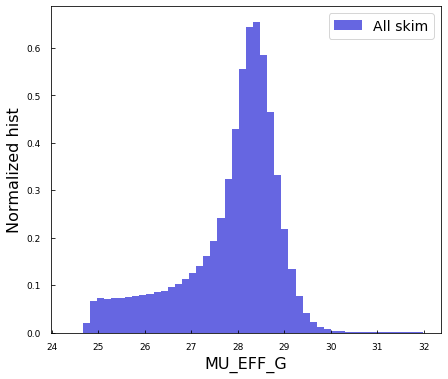

In [36]:
plt.figure(figsize=(7,6))

plt.hist(MU_EFF_MODEL_G[MU_EFF_MODEL_G<32],bins=50,color='mediumblue',density=True,alpha=0.6, label='All skim')

#plt.hist(MAG_AUTO_G_neg,color='red',density=True,alpha=0.6, label='Negatives')

plt.xlabel("MU_EFF_G",fontsize=16);plt.ylabel('Normalized hist',fontsize=16)
plt.legend(fontsize=14)

plt.show()

Load the trained SVM classifier and the scaler

In [4]:
# Load the model from the file 
SVM_class = joblib.load('Classifier.pkl')
# Load the scaler
scaler = joblib.load('Scaler.pkl')

In [5]:
# Define the ellipticity now
ellipticity = 1.0 - B_IMAGE/A_IMAGE

# ===========================================================================================
# Define the colors
col_g_r = MAG_AUTO_G - MAG_AUTO_R
col_g_i = MAG_AUTO_G - MAG_AUTO_I
col_i_r = MAG_AUTO_G - MAG_AUTO_R

In [6]:
# Define the train data matrix of features
X_feat = np.zeros([len(ra),18])
X_feat[:,0] = MAG_AUTO_G;X_feat[:,1] = MAG_AUTO_R;X_feat[:,2] = MAG_AUTO_I
X_feat[:,3] = col_g_r;X_feat[:,4] = col_g_i;X_feat[:,5] = col_i_r
X_feat[:,6] = FLUX_RADIUS_G;X_feat[:,7] = FLUX_RADIUS_R;X_feat[:,8] = FLUX_RADIUS_I
X_feat[:,9] = MU_EFF_MODEL_G;X_feat[:,10] = MU_EFF_MODEL_R;X_feat[:,11] = MU_EFF_MODEL_I
X_feat[:,12] = MU_MAX_G; X_feat[:,13] =  MU_MAX_R;X_feat[:,14] =  MU_MAX_I
X_feat[:,15] = ellipticity;X_feat[:,16] = A_IMAGE; X_feat[:,17] = B_IMAGE

In [16]:
#print(np.mean(MU_MAX_I-MU_MAX_MODEL_I))

In [7]:
X_feat = scaler.transform(X_feat)
y_pred = SVM_class.predict(X_feat)

In [20]:
coadd_id_pos = coadd_id[y_pred==1.]
ra_pos = ra[y_pred==1.]
dec_pos = dec[y_pred==1.]
A_IMAGE_pos = A_IMAGE[y_pred==1.]
B_IMAGE_pos = B_IMAGE[y_pred==1.]
MAG_AUTO_G_pos = MAG_AUTO_G[y_pred==1.]
FLUX_RADIUS_G_pos = FLUX_RADIUS_G[y_pred==1.]
MU_EFF_MODEL_G_pos = MU_EFF_MODEL_G[y_pred==1.]
MU_MAX_G_pos = MU_MAX_G[y_pred==1.]
MU_MAX_MODEL_G_pos = MU_MAX_MODEL_G[y_pred==1.]
MU_MEAN_MODEL_G_pos = MU_MEAN_MODEL_G[y_pred==1.]
MAG_AUTO_R_pos = MAG_AUTO_R[y_pred==1.]
FLUX_RADIUS_R_pos = FLUX_RADIUS_R[y_pred==1.]
MU_EFF_MODEL_R_pos = MU_EFF_MODEL_R[y_pred==1.]
MU_MAX_R_pos = MU_MAX_R[y_pred==1.]
MU_MAX_MODEL_R_pos = MU_MAX_MODEL_R[y_pred==1.]
MU_MEAN_MODEL_R_pos = MU_MEAN_MODEL_R[y_pred==1.]
MAG_AUTO_I_pos = MAG_AUTO_I[y_pred==1.]
FLUX_RADIUS_I_pos = FLUX_RADIUS_I[y_pred==1.]
MU_EFF_MODEL_I_pos = MU_EFF_MODEL_I[y_pred==1.]
MU_MAX_I_pos = MU_MAX_I[y_pred==1.]
MU_MAX_MODEL_I_pos = MU_MAX_MODEL_I[y_pred==1.]
MU_MEAN_MODEL_I_pos = MU_MEAN_MODEL_I[y_pred==1.]

In [10]:
print(len(ra))
print(len(ra_pos))

2016678
43951


Create again some derivative quantities

In [11]:
# Ellipticity
Ell_pos = 1.0 -  B_IMAGE_pos/A_IMAGE_pos
# Colors
col_g_i_pos = MAG_AUTO_G_pos - MAG_AUTO_I_pos
col_g_r_pos = MAG_AUTO_G_pos - MAG_AUTO_R_pos
col_r_i_pos = MAG_AUTO_R_pos - MAG_AUTO_I_pos

**Define the new feature matrix**

In [12]:
# Initialize the matrix
X_feat_mat = np.zeros([len(ra_pos),19])

# Populate the matrix
X_feat_mat[:,0] = Ell_pos # Ellipticity
X_feat_mat[:,1] = col_g_i_pos;X_feat_mat[:,2] = col_g_r_pos; X_feat_mat[:,3] = col_r_i_pos # Colors
X_feat_mat[:,4] = MAG_AUTO_G_pos;X_feat_mat[:,5] = MAG_AUTO_R_pos;X_feat_mat[:,6] = MAG_AUTO_I_pos # Magnitudes
X_feat_mat[:,7] = FLUX_RADIUS_G_pos;X_feat_mat[:,8] = FLUX_RADIUS_R_pos;X_feat_mat[:,9] = FLUX_RADIUS_I_pos # Flux radius
X_feat_mat[:,10] = MU_MAX_MODEL_G_pos;X_feat_mat[:,11] = MU_MAX_MODEL_R_pos;X_feat_mat[:,12] = MU_MAX_MODEL_I_pos # Max surf brightness
X_feat_mat[:,13] = MU_EFF_MODEL_G_pos;X_feat_mat[:,14] = MU_EFF_MODEL_R_pos;X_feat_mat[:,15] = MU_EFF_MODEL_I_pos # Eff surf brightness
X_feat_mat[:,16] = MU_MEAN_MODEL_G_pos;X_feat_mat[:,17] = MU_MEAN_MODEL_R_pos;X_feat_mat[:,18] = MU_MEAN_MODEL_I_pos #Mean surf brightness

**Import Scaler and SVM**

In [13]:
# Load the model from the file 
SVM_class_2 = joblib.load('Classifier_2nd.pkl')
# Load the scaler
scaler_2 = joblib.load('Scaler_2nd.pkl')

In [15]:
X_ft_stand = scaler_2.transform(X_feat_mat)

In [18]:
y_pred_2 = SVM_class_2.predict(X_ft_stand)

In [32]:
y_pred_proba = SVM_class_2.predict_proba(X_ft_stand)

In [35]:
y_pred_prob_pos = y_pred_proba[:,1]

In [63]:
coadd_id_double_pos = coadd_id_pos[y_pred_prob_pos>0.2]
ra_double_pos = ra_pos[y_pred_prob_pos>0.2]
dec_double_pos = dec_pos[y_pred_prob_pos>0.2]

print(len(ra_double_pos))

29526


In [62]:
coadd_id_neg = coadd_id_pos[y_pred_prob_pos<0.2]
ra_neg = ra_pos[y_pred_prob_pos<0.2]
dec_neg = dec_pos[y_pred_prob_pos<0.2]


print(len(ra_neg))

14425


In [64]:
np.save("coadd_double_pos", coadd_id_double_pos)

In [40]:
# Initialize array
Array = np.zeros([100,64,64,3])

In [26]:
import urllib.request

In [60]:
import time
from IPython.display import clear_output, display
zoom = 15

# Let's also time it
tim_in = time.time()

for i in range(100):
    j = i +400#
    # Give a name to the figure. Name them as "Image_cand_(i).jpb
    # Where i is the number of the candidate
    # This is easy to change to ra, dec or coadd ID or whatever...
    fig_name = "Image_cand.jpg"
    
    #Create now the name of the URL
    # This need to have as inputs (that change) the RA, DEC of each objec and zoom
    RA_loc = ra_double_pos[j] #The RA of the i-th object
    DEC_loc = dec_double_pos[j] # The DEC of the i-th object
    
    url_name = "http://legacysurvey.org//viewer/jpeg-cutout?ra={0}&dec={1}&zoom={2}&layer=des-dr1".format(RA_loc,DEC_loc,zoom)
    #url_name = "https://www.legacysurvey.org//viewer/jpeg-cutout?ra={0}&dec={1}&layer=hsc2&zoom={2}".format(RA_loc,DEC_loc,zoom)
    urllib.request.urlretrieve(url_name, fig_name) #Retrieves and saves each image
    
    image = Image.open('Image_cand.jpg')
    # resize image
    new_image = image.resize((64, 64))
    # Convert the image to an RGB array
    im_array = np.asarray(new_image)
    
    Array[i] = im_array
    
    clear_output(wait=True)
    print('runs:',i)
    # Leaving this here as an alternative way to do it
    #f = open(fig_name,'wb') #Open file and give name to save figure
    #f.write(urllib.urlopen(url_name).read()) #Open and read image from url
    #f.close() # Close the file
    
tim_fin = time.time()
print("Time to produce the figures (in minutes):")
print((tim_fin-tim_in)/60.0)

runs: 99
Time to produce the figures (in minutes):
1.9561625003814698


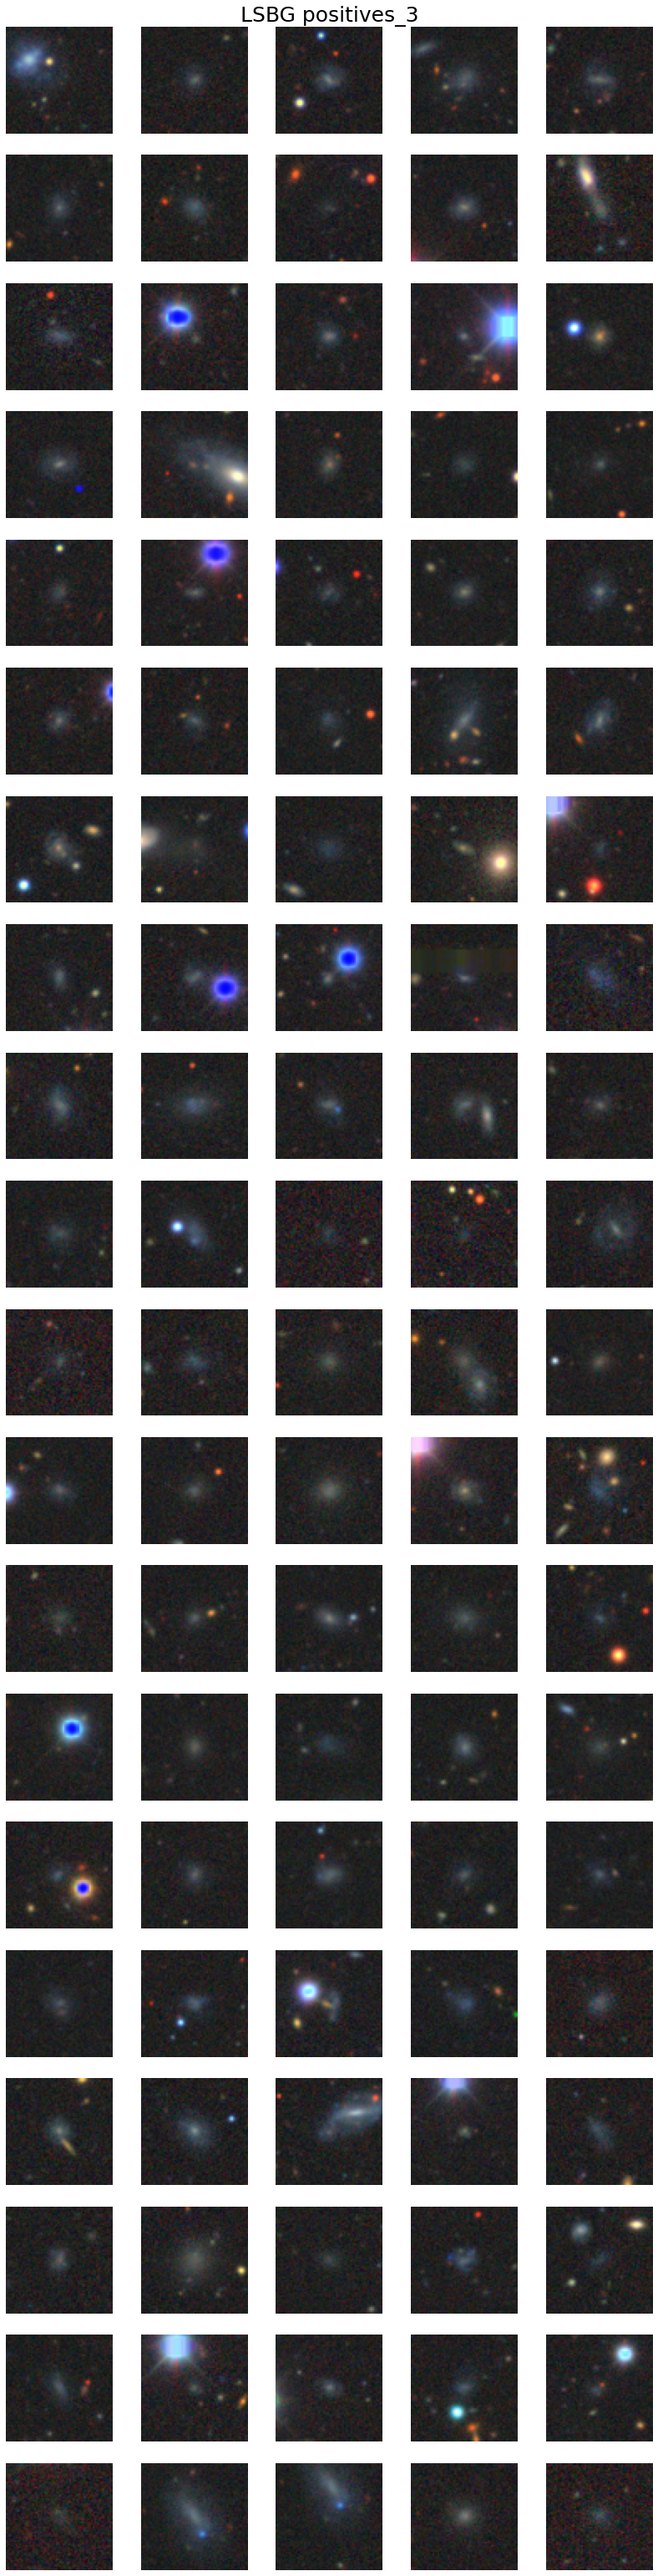

In [61]:
# Plot them
n_rows = 20
n_cols = 5

plt.figure(figsize=(4*n_cols*0.7, 4*n_rows*0.7))

for i in range(n_rows*n_cols):
    if (i==3):
        plt.title("LSBG positives_3",fontsize=25)
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(Array[i]/255.)
    plt.axis('off')
plt.savefig("LSBG_positives_3.pdf")

**Let's get some faint objects**

In [24]:
ra_faint = ra[(MU_EFF_MODEL_G>28)&(MU_EFF_MODEL_G<30)]
dec_faint = dec[((MU_EFF_MODEL_G>28)&(MU_EFF_MODEL_G<30))]

print(len(ra_faint))

1162839


In [25]:
# Initialize array
Array = np.zeros([100,64,64,3])

In [26]:
import time
from IPython.display import clear_output, display
zoom = 15

# Let's also time it
tim_in = time.time()

for i in range(100):
    j = i +400#
    # Give a name to the figure. Name them as "Image_cand_(i).jpb
    # Where i is the number of the candidate
    # This is easy to change to ra, dec or coadd ID or whatever...
    fig_name = "Image_cand.jpg"
    
    #Create now the name of the URL
    # This need to have as inputs (that change) the RA, DEC of each objec and zoom
    RA_loc = ra_faint[j] #The RA of the i-th object
    DEC_loc = dec_faint[j] # The DEC of the i-th object
    
    url_name = "http://legacysurvey.org//viewer/jpeg-cutout?ra={0}&dec={1}&zoom={2}&layer=des-dr1".format(RA_loc,DEC_loc,zoom)
    #url_name = "https://www.legacysurvey.org//viewer/jpeg-cutout?ra={0}&dec={1}&layer=hsc2&zoom={2}".format(RA_loc,DEC_loc,zoom)
    urllib.request.urlretrieve(url_name, fig_name) #Retrieves and saves each image
    
    image = Image.open('Image_cand.jpg')
    # resize image
    new_image = image.resize((64, 64))
    # Convert the image to an RGB array
    im_array = np.asarray(new_image)
    
    Array[i] = im_array
    
    clear_output(wait=True)
    print('runs:',i)
    # Leaving this here as an alternative way to do it
    #f = open(fig_name,'wb') #Open file and give name to save figure
    #f.write(urllib.urlopen(url_name).read()) #Open and read image from url
    #f.close() # Close the file
    
tim_fin = time.time()
print("Time to produce the figures (in minutes):")
print((tim_fin-tim_in)/60.0)

runs: 99
Time to produce the figures (in minutes):
1.4845300674438477


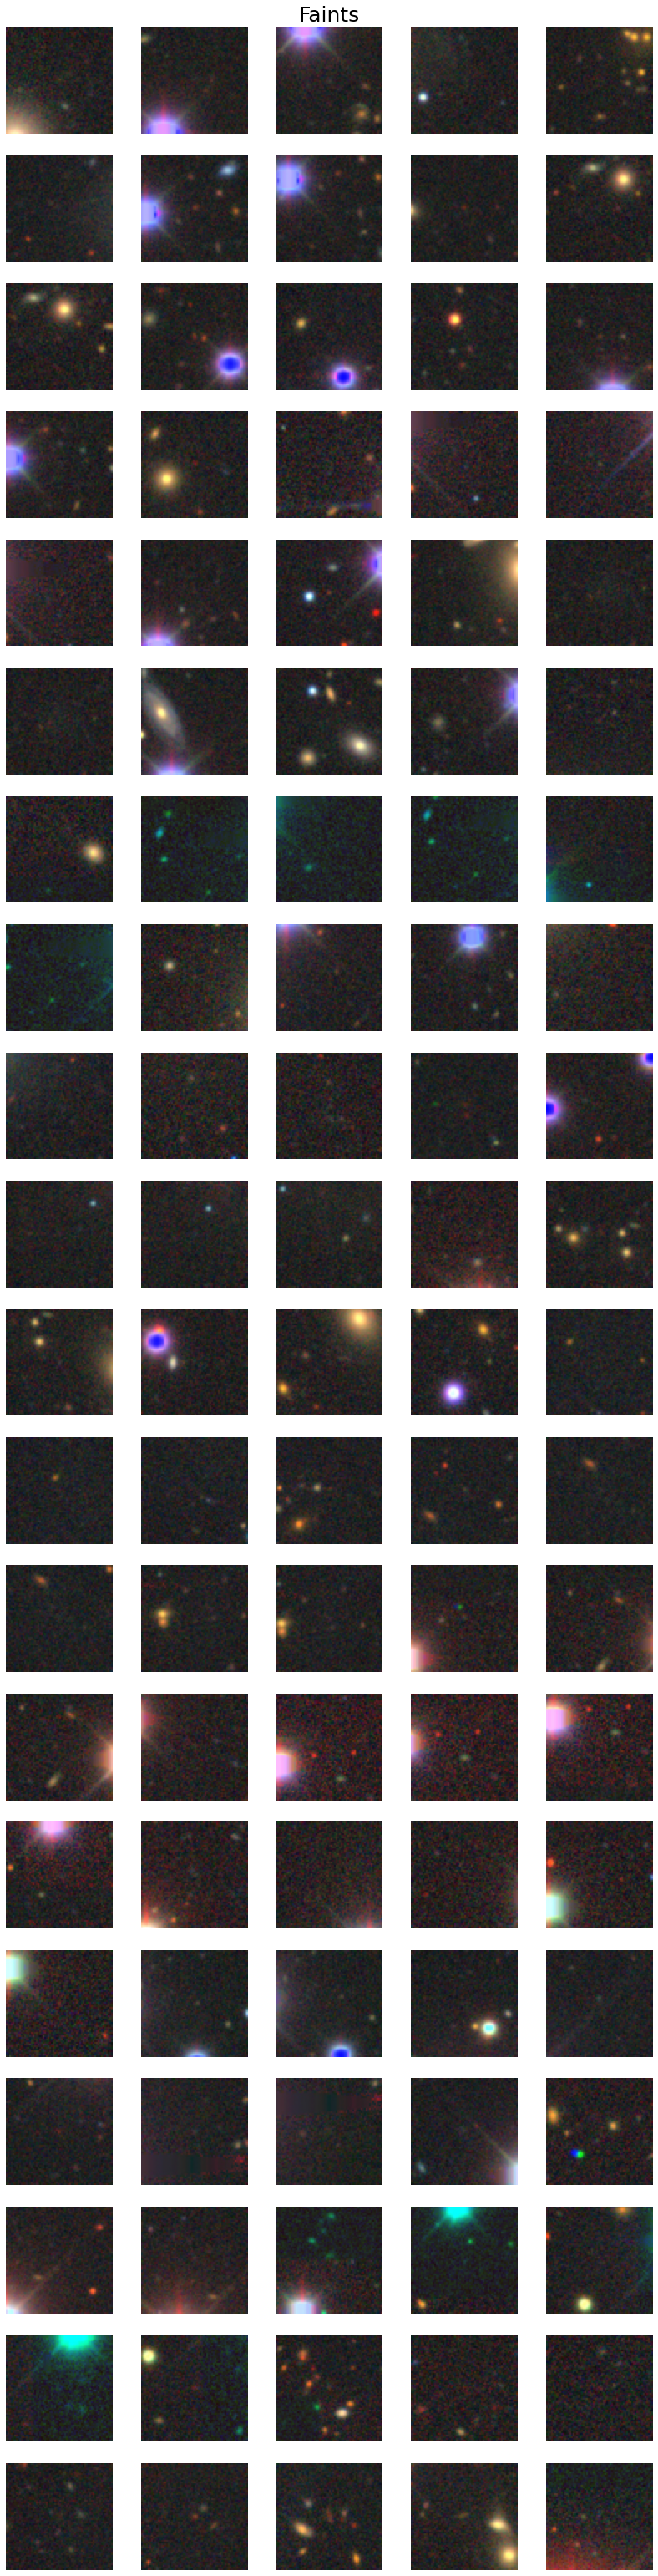

In [27]:
# Plot them
n_rows = 20
n_cols = 5

plt.figure(figsize=(4*n_cols*0.7, 4*n_rows*0.7))

for i in range(n_rows*n_cols):
    if (i==3):
        plt.title("Faints",fontsize=25)
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(Array[i]/255.)
    plt.axis('off')
plt.savefig("Faints.pdf")